In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import linalg as la
from mpl_toolkits.mplot3d import Axes3D

# Construcción de la ecuación 3-D (Patrón de oscilación)

Es importante definirla en el origen

Si hay columnas con np.NaN entonces se debe remover el índice de la columna, obtener la eofs y después volverlas a colocar a la hora de desdoblarlos

In [2]:
x,y=np.arange(-2,2.02,0.05),np.arange(-2,2.02,0.05)
#Creación de la malla (extiende la x tantas veces como y haya)
X,Y=np.meshgrid(x,y)
f1=np.cos(Y)+np.sin(X)

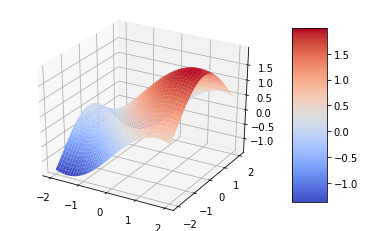

In [23]:
fig = plt.figure()
ax = fig.gca(projection="3d")
surf1=ax.plot_surface(X,Y,f1,cmap="coolwarm")
fig.colorbar(surf1,shrink=0.8,aspect=5)

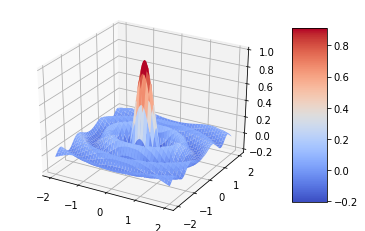

In [24]:
f2=np.sinc(np.sqrt((X*2)**2+(Y*3)**2))
fig2=plt.figure()
ax = fig2.gca(projection="3d")
surf2=ax.plot_surface(X,Y,f2,cmap="coolwarm")
fig2.colorbar(surf2,shrink=0.8,aspect=5)

# Creación del modulador de tiempo

In [25]:
modulador1=np.sin((np.arange(0,200,1)/199)*20*np.pi)  #Este es el patrón dominante en el tiempo
modulador2=np.sin((np.arange(0,200,1)/199)*10*np.pi)

In [26]:
modulador1[10]

-0.01578624201363746

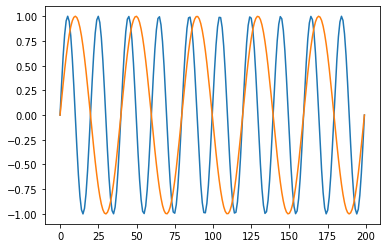

In [27]:
plt.plot(modulador1)
plt.plot(modulador2)

# Creación de las matrices

In [28]:
matriz_f1=np.zeros([len(modulador1),len(x),len(y)])
matriz_f2=np.zeros([len(modulador2),len(x),len(y)])
# matriz_f3=(matriz_f1/np.max(matriz_f1))+(matriz_f2/np.max(matriz_f2))

In [29]:
for i in range(len(modulador1)):
    matriz_f2[i,:,:]=f2*modulador1[i]
#     print(np.min(f2*modulador1[i]))
#     matriz_f2[i,:,:]=f2*modulador1[i]

In [30]:
len(x)

81

In [31]:
matriz_f2[1,:,:].shape

(81, 81)

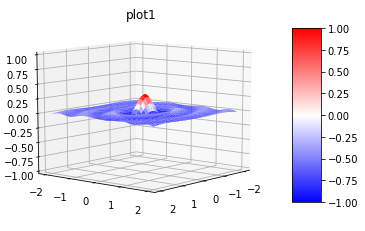

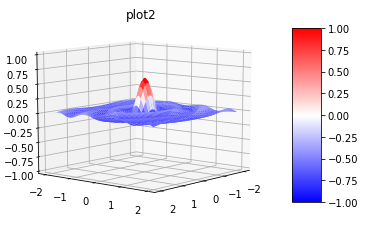

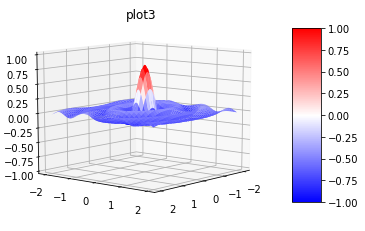

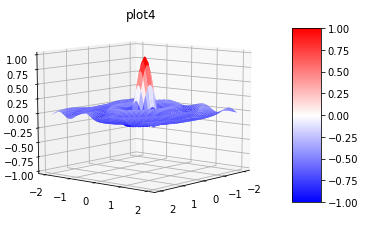

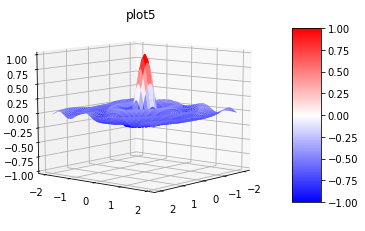

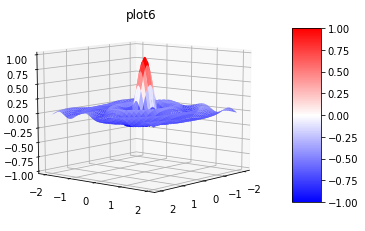

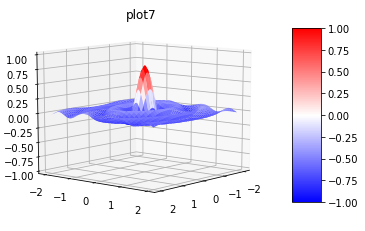

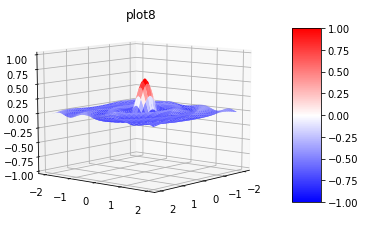

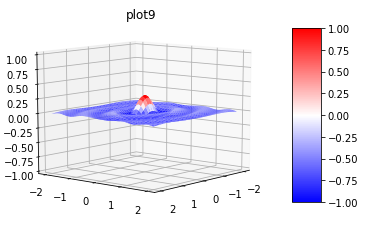

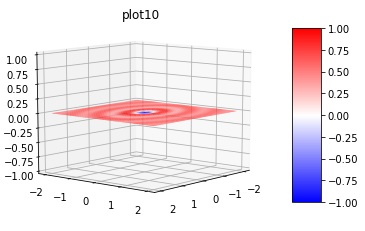

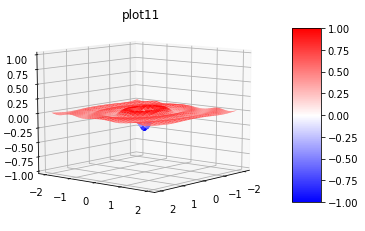

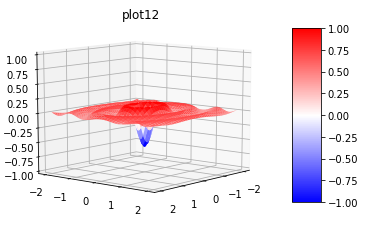

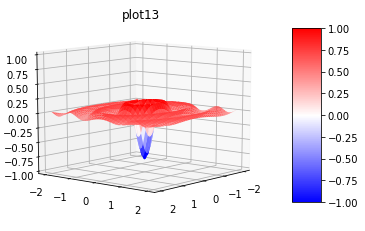

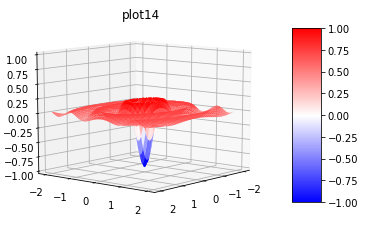

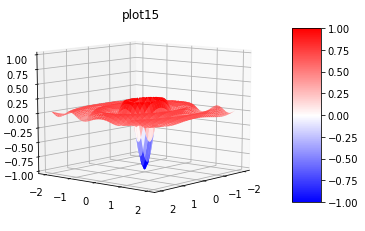

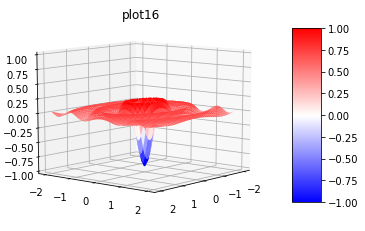

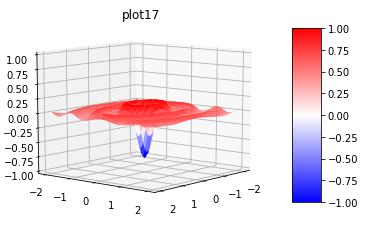

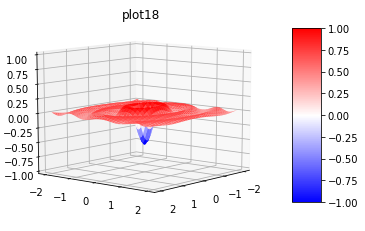

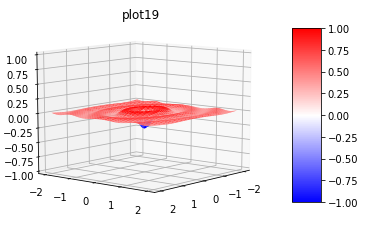

In [32]:
import matplotlib.cm as cm
for i in range(1,20):
    f2=np.sinc(np.sqrt((X*2)**2+(Y*3)**2))
    fig2=plt.figure()
    ax = fig2.gca(projection="3d")
    ax.set_zlim((-1,1))
    ax.set_title("plot"+str(i))
    ax.view_init(10, 40)
    surf2=ax.plot_surface(X,Y,matriz_f2[i,:,:],cmap="bwr")
    bounds=np.linspace(-1,1.,1000)
    m = cm.ScalarMappable(cmap='bwr')
    m.set_array(bounds)
    plt.colorbar(m,shrink=0.8,aspect=6)
    if i<10:
        plt.savefig('mod_00'+str(i)+'.png')
    else:
        plt.savefig('mod_0'+str(i)+'.png')

In [13]:
def GIF(ruta,ruta_out,dur):
    from PIL import Image
    import glob
    
    imgs=sorted(glob.glob(ruta))
    frames=[Image.open(i) for i in imgs]
    
    frames[0].save(ruta_out,format='GIF',append_images=frames[0:],
                  save_all=True,duration=dur,loop=0) 
    
    return None

In [17]:
GIF('/home/franklin/Documentos/GitHub/TDG/Scripts/Clases de datos/*.png','modulador2.gif',10)

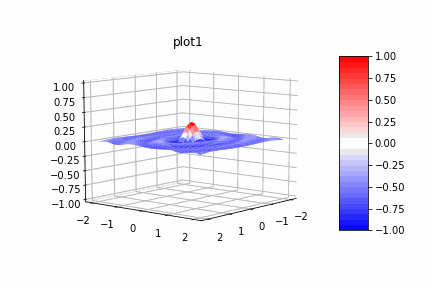

In [20]:
from IPython.display import Image
Image(filename="modulador.gif")

# Construcción de A

In [170]:
Af2.shape

(200, 6561)

In [171]:
matriz_f2.shape

(200, 81, 81)

In [131]:
81*81

6561

In [128]:
Af1=np.reshape(matriz_f1,(len(modulador1),len(x)*len(y)))
Af2=np.reshape(matriz_f2,(len(modulador1),len(x)*len(y)))
# Af3=np.reshape(matriz_f2,(len(modulador2),len(x)*len(y)))
# Af3_corr=np.zeros_like(Af3)#Será una combinación de los modos

In [19]:
for i in range(len(x)*len(y)):
    Af3_corr[:,i]=np.std(Af3[:,i]-np.mean(Af3[:,i]))

Se escala la matriz de Af3 para que queden correlaciones y no covarianzas

In [135]:
U_f1,S_f1,Vh_f1=np.linalg.svd(Af1)
U_f2,S_f2,Vh_f2=np.linalg.svd(Af2)
# U_f3,S_f3,Vh_f3=np.linalg.svd(Af3)
# U_f3_cor,S_f3_cor,Vh_f3_cor=np.linalg.svd(Af3_corr)

In [136]:
U_f2.shape,S_f2.shape,Vh_f2.shape

((200, 200), (200,), (6561, 6561))

In [150]:
X.shape

(81, 81)

De donde:
- U son las componentes principales
- S son los valores propios para cada componente principal: información de la varianza
- Vh son las EOFs

In [137]:
U_f2

array([[-2.22044605e-16,  5.56523000e-07, -3.11376044e-06, ...,
         6.23695976e-07, -4.71131948e-16,  6.74636335e-01],
       [-3.11297250e-02, -2.24589017e-02, -5.81123464e-02, ...,
         1.96744229e-02,  2.82555871e-16, -2.18407083e-02],
       [-5.91818091e-02, -2.04772664e-03, -1.46950812e-01, ...,
        -1.57764763e-01, -1.99389464e-16, -5.20193236e-02],
       ...,
       [ 5.91818091e-02, -6.55749657e-03, -6.24715952e-02, ...,
        -5.00394721e-03, -2.02111698e-16, -2.87745372e-02],
       [ 3.11297250e-02, -1.76513982e-04, -2.16808558e-02, ...,
        -3.67335410e-02,  1.02733331e-15, -4.17451680e-02],
       [ 2.45543989e-16, -1.62855044e-16, -3.19485214e-17, ...,
        -2.08010396e-15, -1.00000000e+00, -2.09654047e-16]])

Text(0, 0.5, 'Porcentaje de varianza')

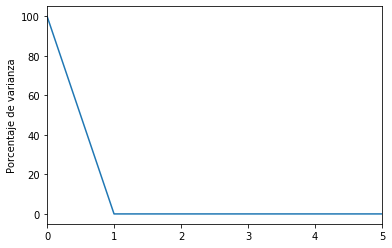

In [142]:
plt.figure()
# plt.plot((S_f1/np.sum(S_f1))*100)
# plt.plot((S_f2/np.sum(S_f2))*100)
# plt.plot((S_f3/np.sum(S_f3))*100)
plt.plot((S_f2/np.sum(S_f2))*100)
plt.xlim(0,5)
plt.ylabel("Porcentaje de varianza")

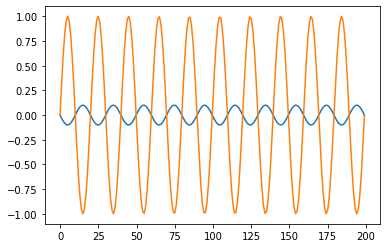

In [149]:
# plt.plot(U_f1[0,:])
plt.plot(U_f2[:,0]) # Notar que este es el modulador es una componente principal
plt.plot(modulador1)

Un figure array con la EOF, la PC y la transformada de Fourier

Espacio-tiempo-escala temporal principal

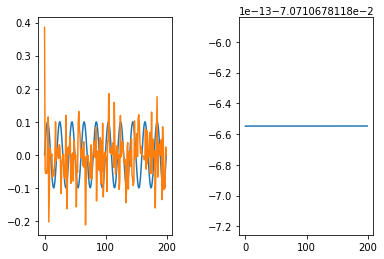

In [181]:
plt.subplot(121)
plt.plot(U_f3[:,0])# Notar que este es el modulador es una componente principal
plt.plot(U_f3[:,1])

plt.subplot(122)
plt.plot(U_f3_cor[:,0])# Notar que este es el modulador es una componente principal
# plt.plot(U_f3_cor[:,1])

plt.subplots_adjust(wspace=0.5)
# plt.plot(U_f3[:,2])# Al ser una componente principal no tan importante, al multiplicarse por su componente
                 #espacial debe ser casi 0
# plt.plot(modulador_2)

In [151]:
81*81*200

1312200

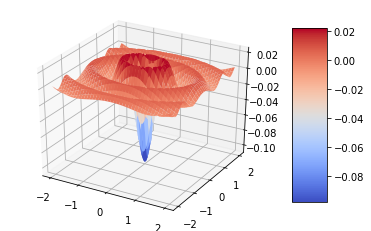

In [160]:
EOF_f2=Vh_f2[0,:].reshape([len(x),len(y)])


fig2=plt.figure()
ax = fig2.gca(projection="3d")
surf2=ax.plot_surface(X,Y,EOF_f2,cmap="coolwarm")
fig2.colorbar(surf2,shrink=0.8,aspect=5)

Siempre pensar en la EOF como algo que varía

- Como filtrar un modo de oscilación

In [185]:
EOF1_f3_cor=Vh_f3_cor[0,:].reshape([len(x),len(y)])
EOF2_f3_cor=Vh_f3_cor[1,:].reshape([len(x),len(y)])

NameError: name 'EOF_f3_cor' is not defined

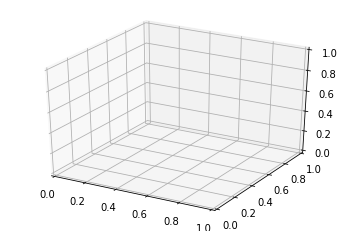

In [188]:
fig2=plt.figure()
ax = fig2.gca(projection="3d")
surf2=ax.plot_surface(X,Y,EOF_f3_cor,cmap="coolwarm")
fig2.colorbar(surf2,shrink=0.8,aspect=5)

In [38]:
norm = mpl.colors.Normalize(vmin=-1.,vmax=1.)